## 载入数据

In [1]:
import tensorflow as tf

# 导入Tensorflow提供的读取MNIST的模块
import tensorflow_core.examples.tutorials.mnist.input_data as input_data

# 读取MNIST数据
mnist = input_data.read_data_sets("/data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


两层神经网络模型.py

In [2]:
# 构建输入层
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

H1_NN = 256  # 第1隐藏层神经元为 256 个
H2_NN = 64  # 第2隐藏层神经元为 64 个

# 输入层 - 第1隐藏层参数和偏置项
W1 = tf.Variable(tf.truncated_normal([784, H1_NN], stddev=0.1))
b1 = tf.Variable(tf.zeros([H1_NN]))

# 第1隐藏层 - 第2隐藏层参数和偏置项
W2 = tf.Variable(tf.truncated_normal([H1_NN, H2_NN], stddev=0.1))
b2 = tf.Variable(tf.zeros([H2_NN]))

# 第2隐藏层 - 输出层参数和偏置项
W3 = tf.Variable(tf.truncated_normal([H2_NN, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

# 计算第1隐藏层结果
Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# 计算第2隐藏层结果
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)

# 计算输出结果
forward = tf.matmul(Y2, W3) + b3
pred = tf.nn.softmax(forward)

三层神经网络模型.py

In [ ]:
H1_NN = 256  # 第1隐藏层神经元为 256 个
H2_NN = 64  # 第2隐藏层神经元为 64 个
H3_NN = 32  # 第3隐藏层神经元为 32 个

# 输入层 - 第1隐藏层参数和偏置项
W1 = tf.Variable(tf.truncated_normal([784, H1_NN], stddev=0.1))
b1 = tf.Variable(tf.zeros([H1_NN]))

# 第1隐藏层 - 第2隐藏层参数和偏置项
W2 = tf.Variable(tf.truncated_normal([H1_NN, H2_NN], stddev=0.1))
b2 = tf.Variable(tf.zeros([H2_NN]))

# 第2隐藏层 - 第3隐藏层参数和偏置项
W3 = tf.Variable(tf.truncated_normal([H2_NN, H3_NN], stddev=0.1))
b3 = tf.Variable(tf.zeros([H3_NN]))

# 第3隐藏层 - 输出层参数和偏置项
W4 = tf.Variable(tf.truncated_normal([H3_NN, 10], stddev=0.1))
b4 = tf.Variable(tf.zeros([10]))

# 计算第1隐藏层结果
Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# 计算第2隐藏层结果
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)

# 计算第3隐藏层结果
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)

# 计算输出结果
forward = tf.matmul(Y3, W4) + b4
pred = tf.nn.softmax(forward)

In [3]:
# 定义损失函数
loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y)
)

# 设置训练参数
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples / batch_size)
display_step = 1
learning_rate = 0.01

# 选择优化器
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

# 定义准确率
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
# 训练
# 记录训练开始时间
from time import time

startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})  # 执行批次训练

    # total_batch个批次训练完成后，使用验证数据计算误差与准确率
    loss, acc = sess.run(
        [loss_function, accuracy],
        feed_dict={x: mnist.validation.images, y: mnist.validation.labels},
    )

    if (epoch + 1) % display_step == 0:
        print(
            "Train Epoch:",
            "%02d" % (epoch + 1),
            "Loss=",
            "{:.9f}".format(loss),
            " Accuracy=",
            "{:.4f}".format(acc),
        )

# 显示运行总时间
duration = time() - startTime
print("Train Finished takes:", "{:.2f}".format(duration))

Train Epoch: 01 Loss= 0.165241867  Accuracy= 0.9538
Train Epoch: 02 Loss= 0.141132221  Accuracy= 0.9614
Train Epoch: 03 Loss= 0.166934744  Accuracy= 0.9584
Train Epoch: 04 Loss= 0.148788795  Accuracy= 0.9674
Train Epoch: 05 Loss= 0.163146868  Accuracy= 0.9622
Train Epoch: 06 Loss= 0.131412342  Accuracy= 0.9706
Train Epoch: 07 Loss= 0.151361391  Accuracy= 0.9654
Train Epoch: 08 Loss= 0.163838014  Accuracy= 0.9672
Train Epoch: 09 Loss= 0.156114399  Accuracy= 0.9704
Train Epoch: 10 Loss= 0.133745804  Accuracy= 0.9732
Train Epoch: 11 Loss= 0.132908404  Accuracy= 0.9766
Train Epoch: 12 Loss= 0.153196469  Accuracy= 0.9668
Train Epoch: 13 Loss= 0.169630438  Accuracy= 0.9724
Train Epoch: 14 Loss= 0.167924464  Accuracy= 0.9726
Train Epoch: 15 Loss= 0.174851909  Accuracy= 0.9734
Train Epoch: 16 Loss= 0.214079782  Accuracy= 0.9680
Train Epoch: 17 Loss= 0.165388301  Accuracy= 0.9720
Train Epoch: 18 Loss= 0.187854990  Accuracy= 0.9692
Train Epoch: 19 Loss= 0.223520562  Accuracy= 0.9724
Train Epoch:

## 评估模型

In [5]:
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})

print("Test Accuracy:", accu_test)

Test Accuracy: 0.9742


## 应用模型


In [6]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字

prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

# 查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

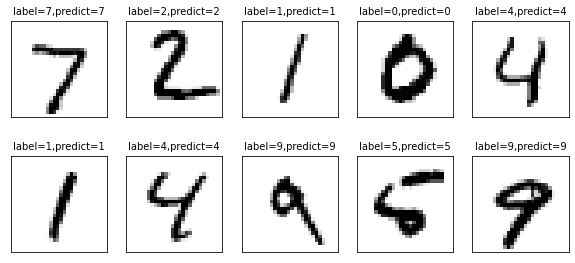

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def plot_images_labels_prediction(
    images,  # 图像列表
    labels,  # 标签列表
    prediction,  # 预测值列表
    index,  # 从第index个开始显示
    num=10,
):  # 缺省一次显示 10 幅
    fig = plt.gcf()  # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 25:
        num = 25  # 最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)  # 获取当前要处理的子图

        ax.imshow(
            np.reshape(images[index], (28, 28)),  # 显示第index个图像
            cmap="binary",
        )

        title = "label=" + str(np.argmax(labels[index]))  # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[index])

        ax.set_title(title, fontsize=10)  # 显示图上的title信息
        ax.set_xticks([])  # 不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()


plot_images_labels_prediction(
    mnist.test.images, mnist.test.labels, prediction_result, 0, 10
)

In [8]:
compare_lists = prediction_result == np.argmax(mnist.test.labels, 1)
print(compare_lists)

[ True  True  True ...  True  True  True]


In [9]:
err_lists = [i for i in range(len(compare_lists)) if compare_lists[i] == False]
print(err_lists, len(err_lists))

[115, 125, 247, 259, 304, 321, 340, 417, 445, 447, 495, 530, 582, 583, 610, 613, 619, 659, 684, 691, 720, 726, 844, 882, 900, 947, 951, 956, 965, 1014, 1039, 1044, 1050, 1107, 1112, 1156, 1192, 1226, 1232, 1242, 1247, 1260, 1311, 1319, 1328, 1364, 1385, 1393, 1466, 1492, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1570, 1621, 1681, 1717, 1748, 1800, 1878, 1901, 1941, 1969, 1973, 2004, 2024, 2047, 2070, 2093, 2098, 2109, 2118, 2125, 2129, 2130, 2135, 2182, 2189, 2266, 2272, 2369, 2387, 2395, 2406, 2426, 2454, 2455, 2488, 2597, 2607, 2648, 2654, 2720, 2721, 2877, 2896, 2915, 2927, 2939, 2953, 2970, 2995, 3001, 3030, 3060, 3073, 3185, 3218, 3225, 3289, 3330, 3422, 3475, 3503, 3520, 3549, 3558, 3559, 3597, 3629, 3674, 3681, 3702, 3776, 3780, 3796, 3808, 3811, 3853, 3869, 3941, 3943, 3951, 3976, 3988, 4000, 4007, 4027, 4063, 4065, 4078, 4093, 4140, 4156, 4163, 4176, 4199, 4201, 4205, 4224, 4248, 4289, 4301, 4306, 4405, 4425, 4497, 4504, 4536, 4615, 4635, 4671, 4690, 4807, 4808, 4823, 4846, 48

In [10]:
# 定义一个输出错误分类的函数
import numpy as np


def print_predict_errs(
    labels,  # 标签列表
    prediction,
):  # 预测值列表
    count = 0
    compare_lists = prediction == np.argmax(labels, 1)
    err_lists = [i for i in range(len(compare_lists)) if compare_lists[i] == False]
    for x in err_lists:
        print(
            "index=" + str(x) + " 标签值=",
            np.argmax(labels[x]),
            "预测值=",
            prediction[x],
        )
        count = count + 1
    print("总计:" + str(count))

In [11]:
print_predict_errs(labels=mnist.test.labels, prediction=prediction_result)

index=115 标签值= 4 预测值= 9
index=125 标签值= 9 预测值= 4
index=247 标签值= 4 预测值= 3
index=259 标签值= 6 预测值= 0
index=304 标签值= 4 预测值= 6
index=321 标签值= 2 预测值= 7
index=340 标签值= 5 预测值= 3
index=417 标签值= 9 预测值= 4
index=445 标签值= 6 预测值= 0
index=447 标签值= 4 预测值= 3
index=495 标签值= 8 预测值= 0
index=530 标签值= 9 预测值= 4
index=582 标签值= 8 预测值= 2
index=583 标签值= 2 预测值= 8
index=610 标签值= 4 预测值= 3
index=613 标签值= 2 预测值= 3
index=619 标签值= 1 预测值= 8
index=659 标签值= 2 预测值= 3
index=684 标签值= 7 预测值= 3
index=691 标签值= 8 预测值= 4
index=720 标签值= 5 预测值= 8
index=726 标签值= 7 预测值= 3
index=844 标签值= 8 预测值= 5
index=882 标签值= 9 预测值= 4
index=900 标签值= 1 预测值= 3
index=947 标签值= 8 预测值= 9
index=951 标签值= 5 预测值= 9
index=956 标签值= 1 预测值= 2
index=965 标签值= 6 预测值= 3
index=1014 标签值= 6 预测值= 8
index=1039 标签值= 7 预测值= 2
index=1044 标签值= 6 预测值= 3
index=1050 标签值= 2 预测值= 3
index=1107 标签值= 9 预测值= 3
index=1112 标签值= 4 预测值= 6
index=1156 标签值= 7 预测值= 8
index=1192 标签值= 9 预测值= 4
index=1226 标签值= 7 预测值= 2
index=1232 标签值= 9 预测值= 4
index=1242 标签值= 4 预测值= 9
index=1247 标签值= 9 预测值= 3
inde

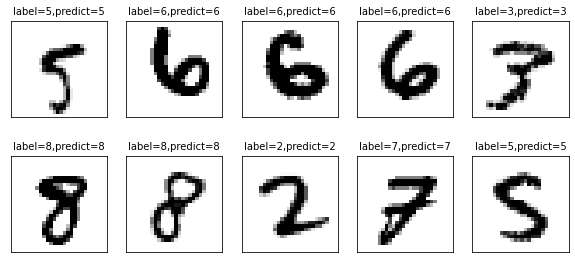

In [12]:
plot_images_labels_prediction(
    mnist.test.images, mnist.test.labels, prediction_result, 460, 10
)

# 重构建模过程

In [1]:
import tensorflow as tf
import tensorflow_core.examples.tutorials.mnist.input_data as input_data

# 下载MNIST数据集到指定目录下
mnist = input_data.read_data_sets("/data/MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 创建模型

In [2]:
# 定义全连接层函数


def fcn_layer(
    inputs,  # 输入数据
    input_dim,  # 输入神经元数量
    output_dim,  # 输出神经元数量
    activation=None,
):  # 激活函数
    W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1))
    # 以截断正态分布的随机数初始化W
    b = tf.Variable(tf.zeros([output_dim]))
    # 以0初始化b
    XWb = tf.matmul(inputs, W) + b  # 建立表达式：inputs * W + b

    if activation is None:  # 默认不使用激活函数
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs


In [3]:
# 构建输入层
x = tf.placeholder(tf.float32, [None, 784], name="X")


In [4]:
# 构建隐藏层
# 隐藏层包含256个神经元
h1 = fcn_layer(inputs=x, input_dim=784, output_dim=256, activation=tf.nn.relu)


In [5]:
# 构建输出层
forward = fcn_layer(inputs=h1, input_dim=256, output_dim=10, activation=None)

pred = tf.nn.softmax(forward)


## 训练模型

In [6]:
# 定义标签数据占位符
y = tf.placeholder(tf.float32, [None, 10], name="Y")


In [7]:
# softmax_cross_entropy_with_logits函数原型：
tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred, name=None)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<tf.Tensor 'softmax_cross_entropy_with_logits_sg/Reshape_2:0' shape=(?,) dtype=float32>

In [8]:
# 定义损失函数

# loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),
# reduction_indices=1)) #原方法：定义交叉熵损失函数
# 改进：使用softmax_cross_entropy_with_logits方法定义交叉熵损失函数
# 把softmax和cross entropy放到一个函数里计算，提高运算速度
loss_function = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y)
)


In [9]:
# 设置训练参数
train_epochs = 40  # 训练轮数
batch_size = 50  # 单次训练样本数（批次大小）
total_batch = int(mnist.train.num_examples / batch_size)  # 一轮训练有多少批次
display_step = 1  # 显示粒度
learning_rate = 0.01  # 学习率


In [10]:
# 选择优化器
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)


In [11]:
# 定义准确率

# 检查预测类别tf.argmax(pred,1)与实际类别tf.argmax(y,1)的匹配情况，相等为1，不等为0,实际要转浮点数
correct_prediction = tf.equal(tf.argmax(y, 1), tf.arg_max(pred, 1))
# 准确率，将布尔值转为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [12]:
# 训练模型

# 记录训练开始时间
from time import time

startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})  # 执行批次训练

    # total_batch个批次训练完成后，用验证数据计算误差与准确率，验证集没有分批
    loss, acc = sess.run(
        [loss_function, accuracy],
        feed_dict={x: mnist.validation.images, y: mnist.validation.labels},
    )

    # 打印训练过程中的详细信息
    if (epoch + 1) % display_step == 0:
        print(
            "Train Epoch:",
            "%02d" % (epoch + 1),
            "Loss=",
            "{:.9f}".format(loss),
            "Accuracy=",
            "{:.4f}".format(acc),
        )
print("Train Finished!")

# 显示运行总时间
duration = time() - startTime
print("Train Finished takes:", "{:.2f}".format(duration))


Train Epoch: 01 Loss= 0.143263668 Accuracy= 0.9614
Train Epoch: 02 Loss= 0.135967791 Accuracy= 0.9628
Train Epoch: 03 Loss= 0.156116292 Accuracy= 0.9626
Train Epoch: 04 Loss= 0.139332220 Accuracy= 0.9666
Train Epoch: 05 Loss= 0.165824383 Accuracy= 0.9644
Train Epoch: 06 Loss= 0.149098799 Accuracy= 0.9680
Train Epoch: 07 Loss= 0.172617704 Accuracy= 0.9688
Train Epoch: 08 Loss= 0.210293233 Accuracy= 0.9648
Train Epoch: 09 Loss= 0.170642138 Accuracy= 0.9694
Train Epoch: 10 Loss= 0.184442803 Accuracy= 0.9722
Train Epoch: 11 Loss= 0.251760066 Accuracy= 0.9692
Train Epoch: 12 Loss= 0.215622514 Accuracy= 0.9720
Train Epoch: 13 Loss= 0.264622927 Accuracy= 0.9670
Train Epoch: 14 Loss= 0.235210642 Accuracy= 0.9722
Train Epoch: 15 Loss= 0.329120219 Accuracy= 0.9696
Train Epoch: 16 Loss= 0.270466149 Accuracy= 0.9736
Train Epoch: 17 Loss= 0.347412258 Accuracy= 0.9672
Train Epoch: 18 Loss= 0.289220363 Accuracy= 0.9710
Train Epoch: 19 Loss= 0.363925427 Accuracy= 0.9710
Train Epoch: 20 Loss= 0.4039954

## 评估模型

In [14]:
# 测试集
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy：", accu_test)
# Test Accuracy： 0.9743


Test Accuracy： 0.9715


## 保存模型

In [12]:
# 初始化参数和文件目录

# 存储模型的粒度
save_step = 5
# 创建保存模型文件的目录
import os

ckpt_dir = "./ckpt_dir/mnist/"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

In [13]:
# 训练时存储模型

# 声明完所有变量后，调用tf.train.Saver
saver = tf.train.Saver()

# 记录训练开始时间
from time import time

startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  # 读取批次数据
        sess.run(optimizer, feed_dict={x: xs, y: ys})  # 执行批次训练

    # total_batch个批次训练完成后，用验证数据计算误差与准确率，验证集没有分批
    loss, acc = sess.run(
        [loss_function, accuracy],
        feed_dict={x: mnist.validation.images, y: mnist.validation.labels},
    )

    # 打印训练过程中的详细信息
    if (epoch + 1) % display_step == 0:
        print(
            "Train Epoch:",
            "%02d" % (epoch + 1),
            "Loss=",
            "{:.9f}".format(loss),
            "Accuracy=",
            "{:.4f}".format(acc),
        )
    if (epoch + 1) % save_step == 0:
        saver.save(
            sess,
            os.path.join(ckpt_dir, "mnist_h256_model_{:06d}.ckpt".format(epoch + 1)),
        )  # 存储模型
        print("mnist_h256_model_{:06d}.ckpt saved".format(epoch + 1))

saver.save(sess, os.path.join(ckpt_dir, "mnist_h256_model.ckpt"))
print("Model saved!")
# print("Train Finished!")

# 显示运行总时间
duration = time() - startTime
print("Train Finished takes:", "{:.2f}".format(duration))


Train Epoch: 01 Loss= 0.204821482 Accuracy= 0.9404
Train Epoch: 02 Loss= 0.144500375 Accuracy= 0.9608
Train Epoch: 03 Loss= 0.158654347 Accuracy= 0.9626
Train Epoch: 04 Loss= 0.192225710 Accuracy= 0.9582
Train Epoch: 05 Loss= 0.190212429 Accuracy= 0.9650
mnist_h256_model_000005.ckpt saved
Train Epoch: 06 Loss= 0.194587678 Accuracy= 0.9650
Train Epoch: 07 Loss= 0.240074143 Accuracy= 0.9634
Train Epoch: 08 Loss= 0.202177301 Accuracy= 0.9672
Train Epoch: 09 Loss= 0.220998585 Accuracy= 0.9652
Train Epoch: 10 Loss= 0.183096409 Accuracy= 0.9712
mnist_h256_model_000010.ckpt saved
Train Epoch: 11 Loss= 0.251323968 Accuracy= 0.9676
Train Epoch: 12 Loss= 0.317449450 Accuracy= 0.9674
Train Epoch: 13 Loss= 0.271372437 Accuracy= 0.9710
Train Epoch: 14 Loss= 0.277574539 Accuracy= 0.9742
Train Epoch: 15 Loss= 0.315537691 Accuracy= 0.9704
mnist_h256_model_000015.ckpt saved
Train Epoch: 16 Loss= 0.290484786 Accuracy= 0.9702
Train Epoch: 17 Loss= 0.280013144 Accuracy= 0.9694
Train Epoch: 18 Loss= 0.3265

## 还原模型

In [15]:
# 设置模型文件的存放目录

# 必须指定为模型文件的存放目录，缺省最多保留最近5份
ckpt_dir = "./ckpt_dir/mnist/"


In [16]:
# 读取模型

saver = tf.train.Saver()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

ckpt = tf.train.get_checkpoint_state(ckpt_dir)

if ckpt and ckpt.model_checkpoint_path:
    saver.restore(sess, ckpt.model_checkpoint_path)  # 从已保存模型中读取参数
    print("Restore model from " + ckpt.model_checkpoint_path)


INFO:tensorflow:Restoring parameters from ./ckpt_dir/mnist/mnist_h256_model.ckpt
Restore model from ./ckpt_dir/mnist/mnist_h256_model.ckpt


In [17]:
# 输出还原模型的准确率
print(
    "Accuracy:",
    accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}),
)

# Accuracy: 0.9744


Accuracy: 0.9715
